<a href="https://academics.sheridancollege.ca/programs/computer-engineering-technology"><img src="https://www.sheridancollege.ca/-/media/project/sheridan/shared/images/logos/sheridan-logo-header.svg" width="300" align="center"></a>


<h1><center>AI Application (ENGI51071) - Lab 5 </center></h1>
<h2><center>Student Name(s): Confidence Ahuekwe | Student Number: 991714953 | Date: 7th March, 2024.</center></h2> 


<h3>Lab Overview</h3>
This is part of the lab series for AI Application (ENGI51071). In this lab, we learn how to use Python libary to implement Decision Tree and Random Forest. 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#Import_Needed_Packages'>Import Needed Packages</a></li>
        <li><a href='#Decision_Tree'>Decision Tree</a></li>
        <li><a href='#Random_Forest'>Random Forest</a></li>   
        <li><a href='#Practice'>Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id='Import_Needed_Packages'></a>
<h2> 1. Import Needed packages </h2>
<h3> For this lab, the following packages are needed </h3><br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes<br>
sklearn: scikit-learn, a commonly used machine learning library. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a id='Decision_Tree'></a>
<h2> 2. Decision Tree </h2>
<h3> For this lab, we are going to use our own randomly generated data. </h3>

In this section, we are going to create random clusters of points with labels. Scikit-learn has a make_blobs class that are able to create a cluster of points called blob. The benefit is that all points created this way will have an inherently label identifying which cluster it belongs to. <br>

In order for make_blobs to work properly, let's look into the following paramters:<br>

n_samples: int or array type, default = 100. Represents the total number of points of the dataset. If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.<br>

centers: int or array of shape, default=None. The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

cluster_std: float or sequence of floats, default=1.0. The standard deviation of the clusters. 

random_state: int, default=None. Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. <br>


<h4>Scikit-learn make_blobs reference: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs">click here</a></h4>

<h4>Scikit-learn randomized data generation: <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py">click here</a></h4>


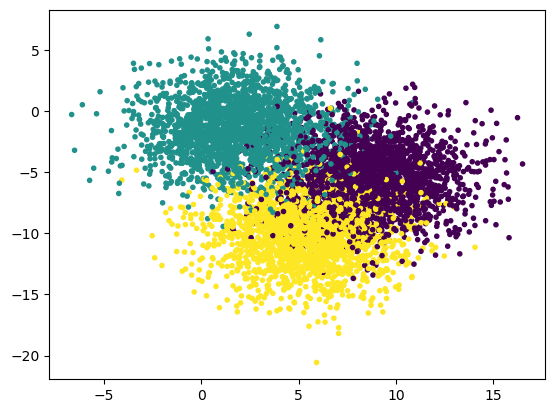

In [28]:
from sklearn.datasets import make_blobs

n_samples = [2000,2000,2000]
random_state = 200
cluster_std = 2.5
centers = None

X, Y_true = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state, cluster_std=cluster_std)
plt.scatter(X[:, 0], X[:, 1], marker='.', c=Y_true)

Based on the code above and the related parameters, please answer the following questions based on your observation. 

__(0.5') Question 1__:  What is the impact of doubling the value of parameter cluster_std? Why? <br>
Please record your answers on lab5 on SLATE quiz tool. <br>
__Ans:__ The parameter cluster_std controls the standard deviation of the clusters. By doubling its value, the clusters will become more spread out and overlapping. This will make it harder for the clustering algorithm to separate them and assign them to the correct centroids. As a result, the clustering quality will decrease and the cluster labels will be less accurate. <br>

__(0.5') Question 2__:  What are the total number of data points?  How to change it?  <br>
Please record your answers on lab5 on SLATE quiz tool. <br>

__Ans:__ The total number of data points is determined by the n_samples parameter, n_samples = [2000, 2000, 2000], which means there are three clusters with 2000 samples each. Therefore, the total number of data points is 6000.

To change the number of data points, we can modify the n_samples parameter with a different list of values. For example, if we want to have four clusters with 1000 samples each, we can set n_samples = [1000, 1000, 1000, 1000]. This will reduce the total number of data points to 4000. Alternatively, if we want to have two clusters with 3000 samples each, we can set n_samples = [3000, 3000]. This will keep the total number of data points at 6000, but change the number of clusters. <br>

__(0.5') Question 3__:  What are the features of this dataset generated by make_blobs?  <br>
Please record your answers on lab5 on SLATE quiz tool. <br>
__Ans:__ The features of this dataset are the numerical characteristics of each data point. In this case, there are two features, which correspond to the x and y coordinates of the data points on the scatter plot. The features are stored in the X array, which has a shape of (n_samples, n_features). You can access the first feature by indexing X[:, 0] and the second feature by indexing X[:, 1]. <br>

__(0.5') Question 4__:  What do the colors of these points stand for?  <br>
Please record your answers on lab5 on SLATE quiz tool. <br>
__Ans:__ The colors of the points on the scatter plot represent the true cluster labels of the data points generated by make_blobs. Each cluster has a different color, such as green, purple, or yellow. The cluster labels are stored in the Y_true array, which has the same length as the number of data points. You can access the cluster label of each data point by indexing Y_true[i], where i is the index of the data point. The cluster labels are useful for evaluating the performance of the clustering algorithm, as they indicate the ground truth of the data. 

__(1')Task 1__ Now split the dataset into test (80%) and training samples (20%). Please record your answers on lab5 on SLATE quiz tool. <br>

In [29]:
# Test your code here (1') 
from sklearn.model_selection import train_test_split

# Split the data into test (80%) and training (20%) samples
train_X, test_X, train_y, test_true_y = train_test_split(X, Y_true, test_size=0.8, random_state=random_state)


DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples: <br>
<h4>Scikit-learn decision tree classifier: <a href="https://scikit-learn.org/stable/modules/tree.html">click here</a></h4>

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(train_X,train_y)
predict_y = clf.predict(test_X)

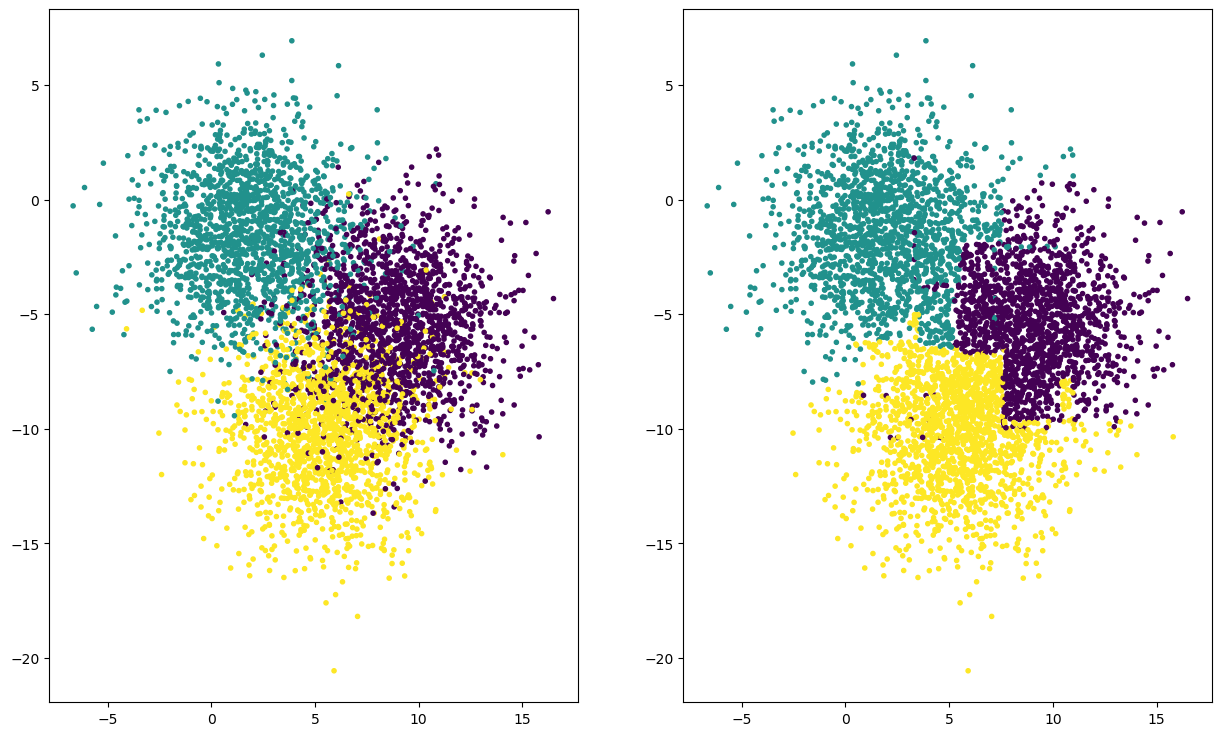

In [31]:
# visulaization of the prediction results. 

f, imagarray = plt.subplots(1,2,figsize= (15,9)) # you can adjust figure size to allow more details to be shown
imagarray[0].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=test_true_y)
imagarray[1].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=predict_y)

Based on the code above and the related parameters, please answer the following questions based on your observation. 

__(1') Question 5__:  What is the impact of increase the maximum depth of the decision tree? <br>
Please record your answers on lab5 on SLATE quiz tool. <br>
__Ans:__ The maximum depth of the decision tree is a hyperparameter that controls the complexity of the model. It determines how many levels of nodes and splits the tree can have.Increasing the maximum depth means a more complex and flexible model, but also a higher risk of overfitting the training data. A lower maximum depth means a simpler and more generalizable model, but also a higher risk of underfitting the data.

Based on the code above, we have set the maximum depth to 6, which means the decision tree can have up to 6 levels of nodes and splits. If we increase the maximum depth, the decision tree will be able to capture more details and patterns in the data, but it may also learn some noise and outliers that are not relevant for the prediction. This may result in a higher accuracy on the training data, but a lower accuracy on the test data.

Once a tree is created, you can call plot_tree to visualize the full grown tree:

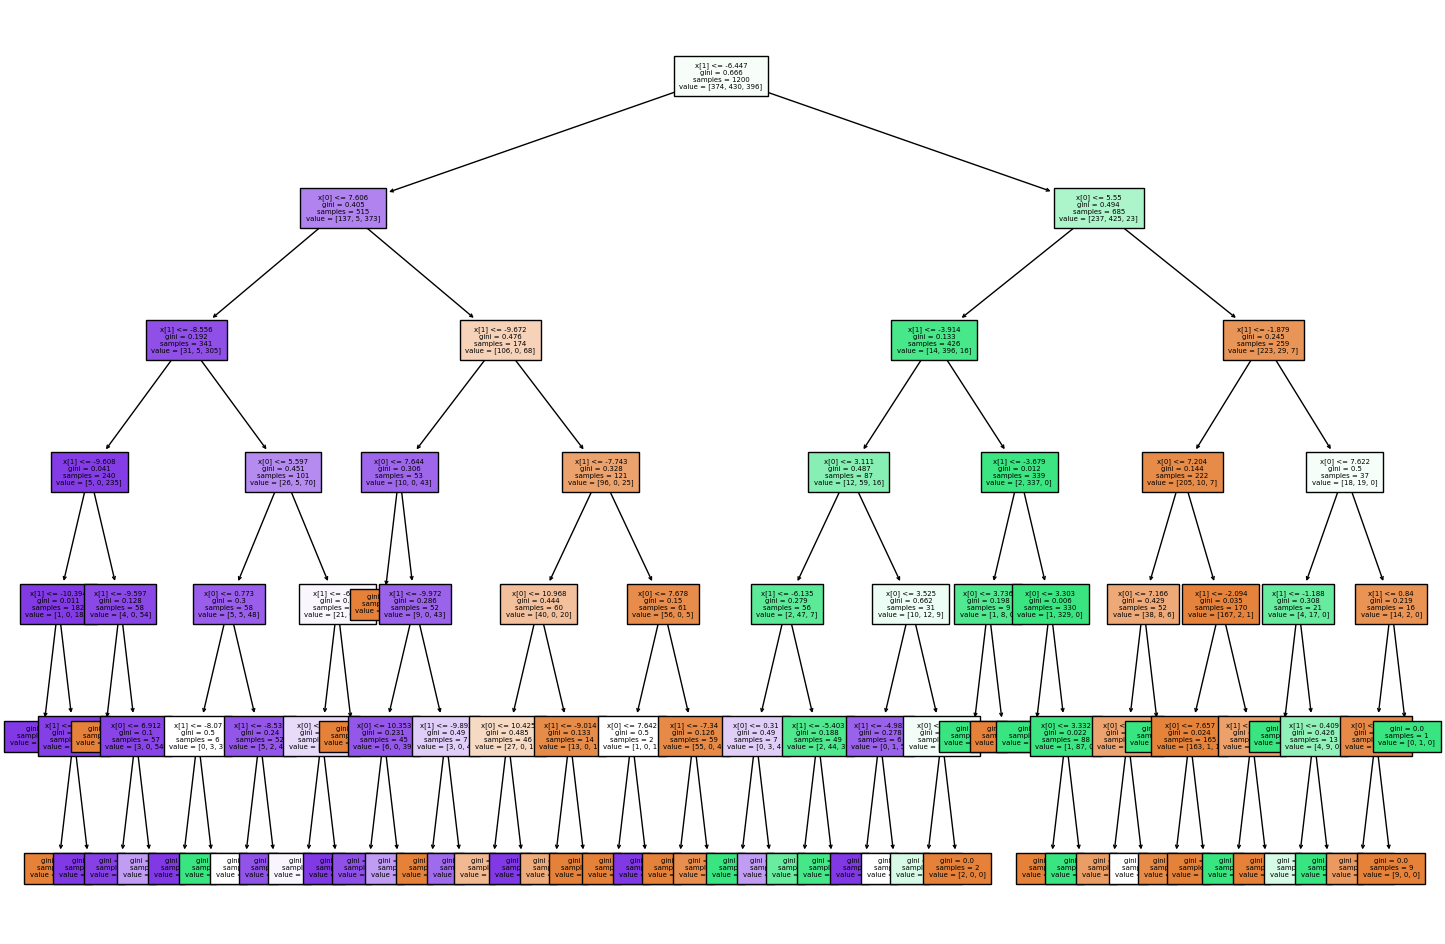

In [32]:
plt.figure(figsize=(18,12))  # you can adjust figure size to allow more details to be shown
tree_struct = tree.plot_tree(clf, filled = True, fontsize=5) # you can adjust font size to allow more details to be shown
plt.show()

<a id='Random_Forest'></a>
<h2> 3. Random Forest </h2>
<h3> In this section, we will create a classifier using Random Forest and the same dataset as section 2. </h3>

In this section, we are going to use the same random clusters of points with labels as generated in Section 2. 
RandomForestClassifier has very similar syntax as DecisionTreeClassifier.  Although the underlying mechanism is more complicated. It is a type of ensemble learning methods that fits a number of decision trees and uses averaging to improve the prediction accuracy and reduce overfitting.  <br>

The syntax of RandomForestClassifier is as below: <br><br><br>
from sklearn.ensemble import RandomForestClassifier<br>
clf = RandomForestClassifier(n_estimators=10, criterion = "entropy") #you can change the parameter to suit your application<br>
clf = clf.fit(trainset_X, trainset_Y)<br>
<br>
predict_Y = clf.predict(testset_X)<br>

<h4>Scikit-learn random forest classifier: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#">click here</a></h4>


__(2') Task 2__:  Please use the cell below to write a program that will implement random forest classifier to predict the the test dataset labels and store them as predict_rf_y. Visualize your results. Record your code on SLATE.

In [33]:
# (2') Test your code here. 
# Import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier with 10 trees and entropy criterion
clf = RandomForestClassifier(n_estimators=10, criterion = "entropy")

# Fit the classifier to the training data
clf = clf.fit(train_X, train_y)

# Predict the labels for the test data and store them as predict_rf_y
predict_rf_y = clf.predict(test_X)

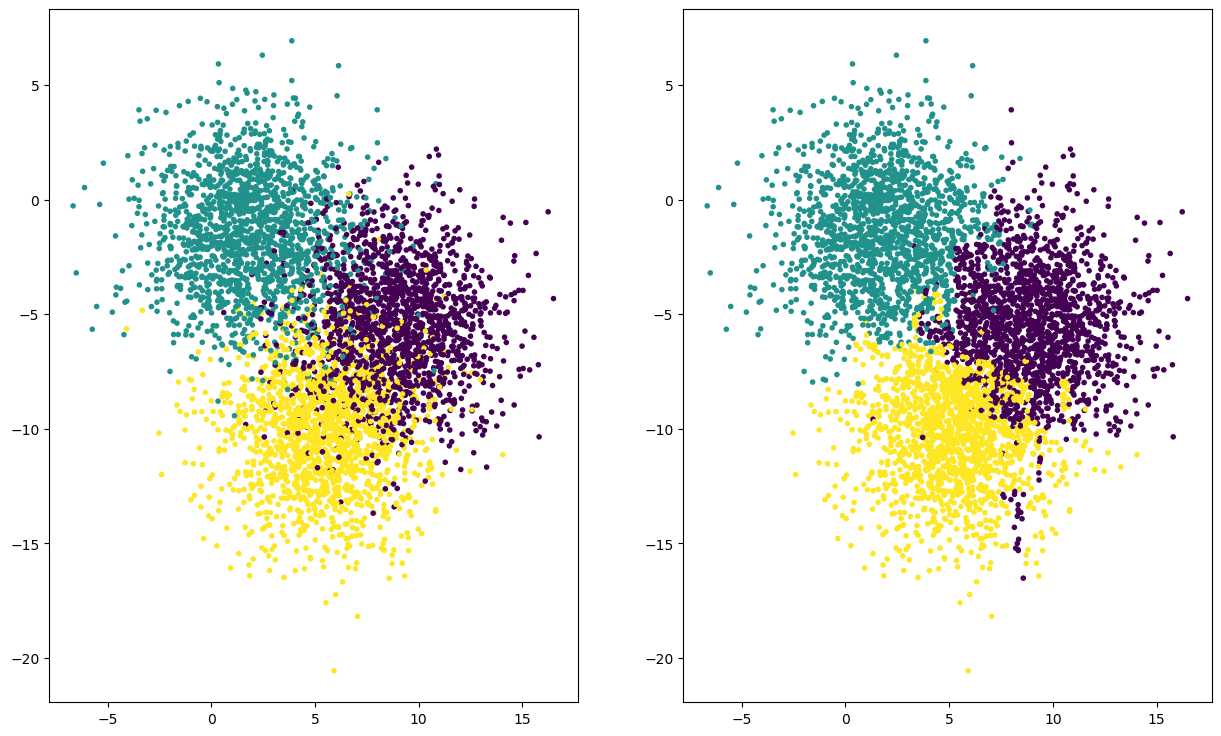

In [34]:
# Create a figure with two subplots
f, imagarray = plt.subplots(1,2,figsize= (15,9))

# Plot the true labels of the test data on the first subplot
imagarray[0].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=test_true_y)

# Plot the predicted labels of the test data on the second subplot
imagarray[1].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=predict_rf_y)

# Show the plots
plt.show()

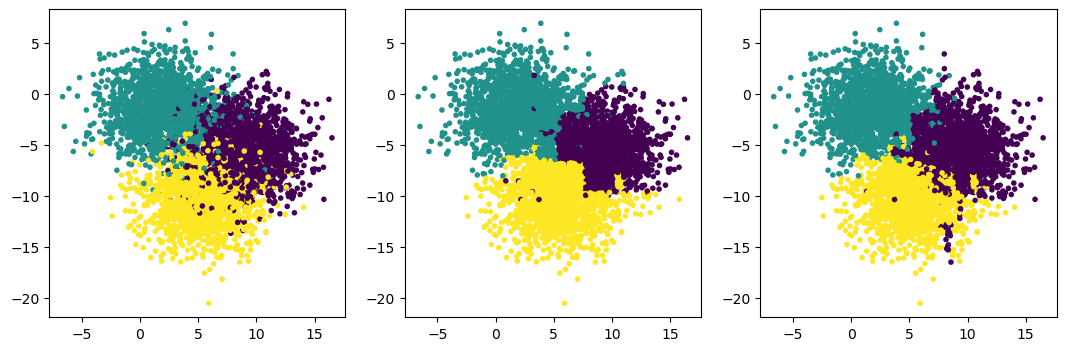

In [35]:
# visualize three types of Y side by side:

f, imagarray = plt.subplots(1,3,figsize= (13,4)) # you can adjust figsize to make details more visible. 
imagarray[0].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=test_true_y)
imagarray[1].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=predict_y)
imagarray[2].scatter(test_X[:, 0], test_X[:, 1], marker='.', c=predict_rf_y)

__(1') Question 6__:  What is the meaning of these three plots respectively? <br>
Please record your answers on lab5 on SLATE quiz tool. <br>
__Ans:__ These plots are scatter plots that show the distribution of data points in two-dimensional space. Each color represents a different label or category of the data. The meaning of these plots may depend on the context and the purpose of the analysis, but generally, they can be interpreted as follows:

The first plot shows a case where the data points are not well separated by their labels, indicating that there is no clear pattern or relationship between the features and the labels. This may suggest that the data is noisy, random, or that the features are not relevant for the classification task. 
The second plot is a visulaization of the prediction results using Decision Tree algorithm that shows a case where the data points are well separated by their labels, indicating that there is a clear pattern or relationship between the features and the labels. This may suggest that the data is clean, structured, or that the features are relevant for the classification task.
The third plot shows a visualization of the prediction results for the same dataset using random forest classifier where the data points are somewhat separated by their labels, but not as clearly as in the second plot. This may suggest that the data is moderately noisy, or that some features are more relevant than others for the classification task.
These plots can be useful for visualizing and exploring the data, as well as for evaluating the performance of different classification models.

<a id='Practice'></a>
<h2>4. Practice </h2>

Sci-kit learn also has some interesting datasets that can be used to test machine learning algorithms. Below we import an iris dataset and create an iris_df dataframe to store it. 

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


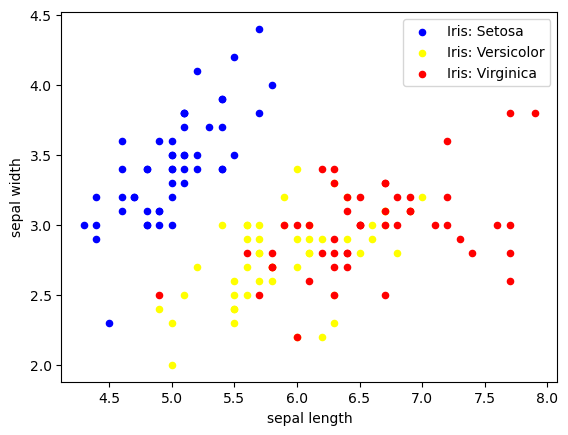

In [36]:
# Import scikit-learn dataset library
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

# print the label species
print(iris.target_names)

# print the names of all features
print(iris.feature_names)

iris_df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

ax = iris_df[iris_df['species'] == 0][0:150].plot(kind='scatter', x='sepal length', y='sepal width', color='Blue', label='Iris: Setosa');
iris_df[iris_df['species'] == 1][0:150].plot(kind='scatter', x='sepal length', y='sepal width', color='Yellow', label='Iris: Versicolor', ax=ax);
iris_df[iris_df['species'] == 2][0:150].plot(kind='scatter', x='sepal length', y='sepal width', color='Red', label='Iris: Virginica', ax=ax);

plt.show()


##### Based on the result above, answer the following questions based on your observation. 

__(3.0') Practice__:  Please use the cell below to predict iris species using either RandomForestClassifier or DecisionTreeClassifier and visualize your final results.  Record your result on SLATE.

Accuracy: 0.7333333333333333


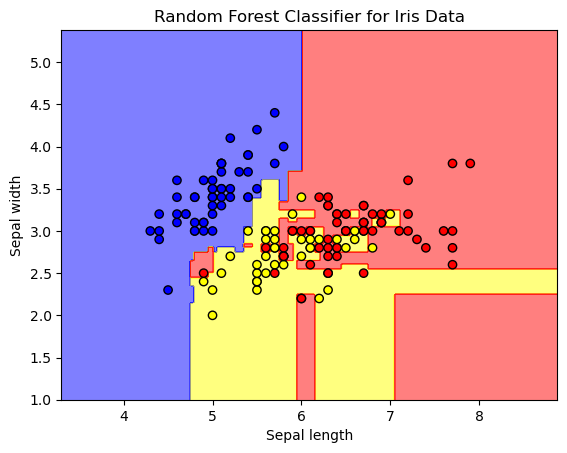

In [40]:
# Test your code here (3')
# Import the necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the features and the target
X = iris.data[:, :2] # use only the first two features (sepal length and sepal width)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the RandomForestClassifier with 10 trees
model = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the decision boundaries of the model
# Define the colors and the colormap for the plot
colors = ["blue", "yellow", "red"]
cmap = ListedColormap(colors)

# Define the minimum and maximum values for the axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points with a fine step
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the labels for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour of the decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

# Plot the original data points with their labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="black")

# Add labels and title
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Random Forest Classifier for Iris Data")

# Show the plot
plt.show()